<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Hands-On
---
Hands-On ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 3 - Semester 8

### Daftar Isi :
1. Transformasi Data
2. Rekayasa Fitur
3. Imputasi
    - Missing Completely At Random
    - Missing At Random
    - Missing Not At Random
4. Tahapan dan Teknik Imputasi
5. Teknik Handling Outlier: Trimming vs Winsorizing
6. Scalling
7. Dokumentasi Data/Fitur
8. Pelabelan Data
    - Supervised Learning
    - Unsupervised Learning
    - Semi-supervised Learning
9. Pendekatan Pelabelan Data
10. Menganalisa Akurasi Pelabelan Data
11. Metode QA untuk Mengukur Kualitas Data
12. Keamanan Pelabelan Data


### 1. Transformasi Data
---

Representasi Fitur atau Pembelajaran Fitur:
- Teknik-Teknik yang memungkinkan sistem bekerja otomatis menemukan representasi yang diperlukan (untuk deteksi fitur atau klasifikasi dari dataset),
- Menggantikan rekayasa fitur manual, dan
- Memungkinkan mesin mempelajari fitur dan menggunakannya untuk melakukan tugas tertentu.


### 2. Rekayasa Fitur
---

Rekayasa Fitur:
- Proses mengubah data mentah menjadi fitur yang:
    - Mewakili masalah mendasar ke model prediktif,
    - Menghasilkan akurasi model yang lebih baik pada data yang tidak terlihat.



### 3. Imputasi
---

Pengertian: Mengganti nilai/data yang hilang (missing value; NaN; blank) dengan nilai pengganti.

Jenis missing value:
1. Missing Completely At Random (MCAR).

Definisi: Probabilitas sebuah instance yang hilang tidak bergantung pada nilai yang diketahui atau nilai yang hilang itu sendiri.

Contoh: Tabel data dicetak tanpa nilai yang hilang dan seseorang secara tidak sengaja menjatuhkan beberapa tinta di atasnya sehingga beberapa sel tidak dapat dibaca lagi. Di sini, kita dapat mengasumsikan bahwa nilai yang hilang mengikuti distribusi yang sama dengan nilai yang diketahui.

2. Missing At Random (MAR).

Definisi: Probabilitas sebuah instance yang hilang mungkin bergantung pada nilai yang diketahui tetapi tidak pada nilai yang hilang itu sendiri.

Contoh: Dalam kasus sensor suhu, fakta bahwa suatu nilai hilang tidak bergantung pada suhu, tetapi mungkin bergantung pada beberapa faktor lain, misalnya pada daya baterai termometer.

Contoh survei: Apakah seseorang menjawab pertanyaan atau tidak - mis. tentang usia- dalam survei tidak tergantung pada jawaban itu sendiri, tetapi mungkin tergantung pada jawaban untuk pertanyaan lain, yaitu jenis kelamin perempuan.


3. Missing Not At Random (MNAR).

Definisi : Probabilitas sebuah instance yang hilang terjadi atau bergantung dengan nilai instance itu sendiri

Pada kasus MNAR, mekanisme bagaimana data tersebut hilang dapat diketahui. Hanya saja, nilai-nilainya tidak dapat disimpulkan. MNAR biasanya terjadi ketika objek penelitian memilih untuk menghindari pertanyaan, misalnya ketika mereka ditanya mengenai jumlah aset. Kelompok usia tertentu mungkin akan memilih untuk tidak menjawabnya. Mekanismenya jelas terlihat, namun sulit untuk bisa mengetahui jumlah pastinya.

### 4. Tahapan dan Teknik Imputasi
---

Imputasi adalah Mengganti nilai/data yang hilang (missing value; NaN; blank) dengan nilai pengganti.

Teknik imputasi berdasarkan tipe data, terdiri dari:
1. Tipe data Variabel Numerik, dengan cara:
   - Imputasi mean atau median.
   - Imputasi nilai suka-suka (arbitrary).
   - Imputasi nilai/data ujung (end of tail).


2. Tipe data Variabel Kategorik, dengan cara:
   - Imputasi kategori yang sering muncul.
   - Tambah kategori yang hilang.

#### 1. Imputasi Tipe data Variabel Numerik

In [ ]:
# Import Library
import pandas as pd

In [ ]:
# Memuat data dengan format csv
df = pd.read_csv("delay_maskapai.csv")

In [ ]:
# Menghitung nilai data yang kosong
df.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [ ]:
# Membuat variabel jumlah data yang akan dihapus secara random
jumlah_hapus = 3012

In [ ]:
# Membuat variabel untuk menampung indeks dari data yang akan dihapus
indeks_hapus = df.sample(n=jumlah_hapus).index

- df.sample(n=jumlah_hapus) mengambil sampel acak dari DataFrame df sebanyak jumlah_hapus yang dideklarasikan sebelumnya.
- .index mengakses indeks dari sampel yang diambil dan mengembalikan objek Pandas Index yang berisi indeks dari data tersebut.

Selanjutnya, indeks dari sampel tersebut ditampung ke variabel indeks_hapus, sehingga variabel ini akan berisi indeks dari data yang akan dihapus dari DataFrame.

In [ ]:
# Membuat baris menjadi nilai None atau Menghapus baris sesuai dengan indeks yang dideklarasikan di variabel indeks_hapus dan pada kolom "Length"
df.loc[indeks_hapus, 'Length'] = None

In [ ]:
# Menghitung nilai data yang kosong
df.isna().sum()

Flight            0
Time              0
Length         3012
Airline           0
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [ ]:
# Menghitung persentase data yang kosong pada kolom "Length"
length_missdata_percentage = (df['Length'].isnull().sum() / df.shape[0]) * 100
length_missdata_percentage

27.922499304718645

- df['Length'].isnull().sum() berfungsi untuk menghitung jumlah data yang kosong pada kolom Length
- df.shape[0] berfungsi untuk menghitung total jumlah baris yang mewakili total jumlah data keseluruhan

Sehingga dapat diketahui persentase dari data yang kosong pada kolom Length dengan jumlah data yang kosong dengan total jumlah data keseluruhan

In [ ]:
# Melakukan imputasi pada data yang kosong dengan menggunakan imputasi rata-rata
meanImputation = df['Length'].mean() #Membuat variabel meanImputation untuk menampung nilai rata-rata dari kolom "Length"
meanImputation

133.38816720257233

In [ ]:
# Mengisi nilai kosong menggunakan fungsi fillna dengan nilai rata-rata pada kolom Length
df['Length'].fillna(meanImputation,
                    inplace=True) #Inplace=True berfungsi untuk memodifikasi kolom "Length" secara langsung tanpa membuat copy)

In [ ]:
jumlah_hapus = 632

In [ ]:
indeks_hapus = df.sample(n=jumlah_hapus).index

In [ ]:
# Membuat baris menjadi nilai None atau Menghapus baris sesuai dengan indeks yang dideklarasikan di variabel indeks_hapus dan pada kolom "Length"
df.loc[indeks_hapus, 'Length'] = None

In [ ]:
# Mengecek nilai data yang kosong
df.isna().sum()

Flight           0
Time             0
Length         632
Airline          0
AirportFrom      0
AirportTo        0
DayOfWeek        0
Class            0
dtype: int64

In [ ]:
# Menghitung persentase data yang kosong pada kolom "Length"
length_missdata_percentage = (df['Length'].isnull().sum() / df.shape[0]) * 100
length_missdata_percentage

5.858904236581069

In [ ]:
# Melakukan imputasi pada data yang kosong dengan menggunakan imputasi median
medianImputation = df['Length'].median()
medianImputation

133.38816720257233

In [ ]:
# Mengisi nilai kosong dengan median
df['Length'].fillna(medianImputation, inplace=True)

In [ ]:
# Mengecek data kosong pada kolom Length
df['Length'].isnull().any()

False

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_sample = pd.read_csv("delay_maskapai.csv")

In [ ]:
df_sample.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [ ]:
# Menghapus secara random 1234 data dari kolom 'length'
remove_indices = np.random.choice(df_sample.index, size=1234, replace=False)
df_sample.loc[remove_indices, 'Length'] = np.nan

In [ ]:
df_sample.isnull().sum()

Flight            0
Time              0
Length         1234
Airline           0
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [ ]:
# !pip install scikit-learn

In [ ]:
# Melakukan import library untuk melakukan imputasi dengan KNN
from sklearn.impute import KNNImputer

In [ ]:
# Membuat instance KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Melakukan imputasi dengan KNN pada kolom 'length' di df_sample
imputed_data = imputer.fit_transform(df_sample[['Length']])

# Mengganti nilai kosong di df_sample dengan data yang telah diimputasi
df_sample.loc[:, 'Length'] = imputed_data

In [ ]:
df_sample.isnull().any()

Flight         False
Time           False
Length         False
Airline        False
AirportFrom    False
AirportTo      False
DayOfWeek      False
Class          False
dtype: bool

In [ ]:
# Melihat hasil dari data kosong yang telah diimputasi
unique_values = df_sample.loc[remove_indices, 'Length'].unique()

print(unique_values)

[133.64482362]


#### 2. Imputasi Tipe data Variabel Kategorikal

In [ ]:
import pandas as pd

In [ ]:
# Memuat data dengan format csv
df = pd.read_csv("delay_maskapai.csv")

In [ ]:
# Mengecek tipe data setiap kolom
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [ ]:
# Mengimport Library Numpy dan Sklearn.impute
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
jumlah_hapus = 814
indeks_hapus = np.random.choice(df.index, jumlah_hapus, replace=False)

In [ ]:
# Membuat copy dari kolom
airline_column = df['Airline'].copy()

# Menghapus baris data secara random sesuai variabel dari indeks hapus di atas
airline_column.loc[indeks_hapus] = np.nan

In [ ]:
# Membuat algoritma SimpleImputer dengan strategi 'most_frequent'
modeImputer = SimpleImputer(strategy='most_frequent')

# Melakukan imputasi dengan SimpleImputer
imputed_data = modeImputer.fit_transform(airline_column.values.reshape(-1, 1))

# Memperbaharui data pada kolom Airline dengan data yang telah diimputasi pada imputed_data
df['Airline'] = imputed_data.flatten()

In [ ]:
# Mengecek nilai unik dari variabel imputed_data
np.unique(imputed_data)

array(['9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ',
       'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV'], dtype=object)

In [ ]:
# Mengecek apakah ada data kosong pada kolom Airline
df['Airline'].isna().any()

False

### 5. Teknik Handling Outlier : Trimming vs Winsorizing
---

- Trimming
    - Nama lain: Truncation (Potong)
    - Definisi: Menghapus outlier dari dataset
    - Perlu memutuskan metrik untuk menentukan outlier
- Winsorizing
    - Definisi: Mengganti outlier dari dataset dengan nilai persentil setiap ujung/batas atas dan bawah.



In [ ]:
# Import Library
import pandas as pd

In [ ]:
# Memuat data dengan format csv
df = pd.read_csv("delay_maskapai.csv")

In [ ]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [ ]:
# Import Library matplotlib.pyplot & Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

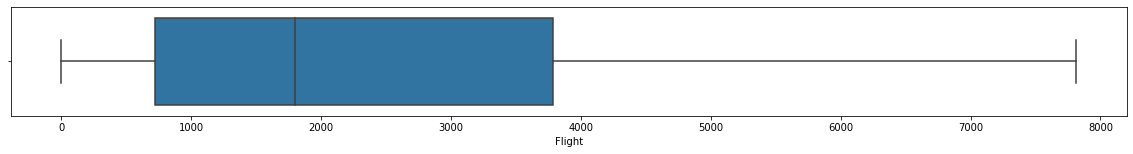

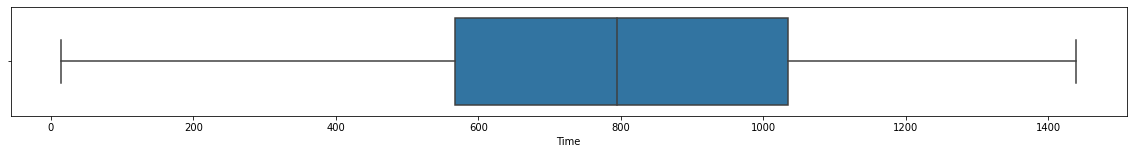

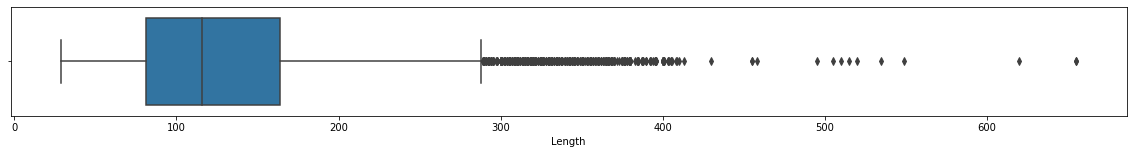

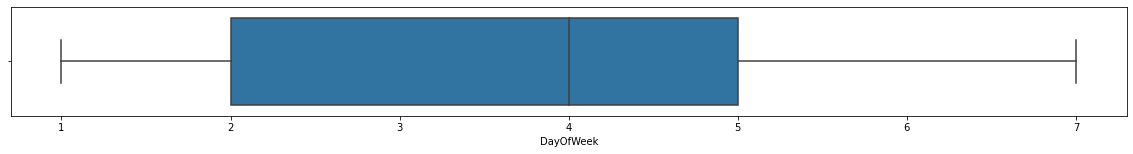

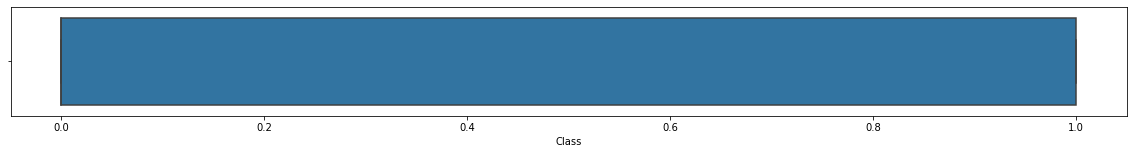

In [ ]:
# Mencari Outliers - Boxplot
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

Dapa dilihat dari boxplot di atas bahwa kolom Length memiliki outliers di atas batas maksimum

#### Teknik Trimming (Pangkas) Outlier
----

In [ ]:
# Mengecek tipe data pada setiap kolom
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [ ]:
# Memilih kolom dengan tipe data selain object
df.select_dtypes(exclude="object").head()

,Flight,Time,Length,DayOfWeek,Class
0,320.0,870.0,180.0,5,0
1,3045.0,365.0,66.0,2,0
2,1560.0,740.0,257.0,7,0
3,1156.0,595.0,235.0,7,1
4,1873.0,530.0,133.0,6,1


In [ ]:
q1 = df.select_dtypes(exclude="object").quantile(0.25)
q3 = df.select_dtypes(exclude="object").quantile(0.75)
iqr = q3-q1
iqr

Flight       3065.5
Time          468.0
Length         83.0
DayOfWeek       3.0
Class           1.0
dtype: float64

In [ ]:
batas_atas = q3 + 1.5 * iqr
batas_atas

Flight       8383.75
Time         1737.00
Length        288.50
DayOfWeek       9.50
Class           2.50
dtype: float64

In [ ]:
df_noid_outlier_clean = df[~((df.select_dtypes(exclude="object") < q1 - 1.5 * iqr) | (df.select_dtypes(exclude="object") > q3 + 1.5 * iqr)).any(axis=1)]

1. df.select_dtypes(exclude="object") memilih hanya kolom-kolom dengan tipe data numerik (mengabaikan kolom-kolom dengan tipe data objek).
<br><br>
2. q1 dan q3 mewakili kuartil pertama (25%) dan kuartil ketiga (75%) dari data numerik yang dipilih.
<br><br>
3. iqr adalah rentang antarkuartil (interquartile range), yaitu selisih antara kuartil ketiga dan kuartil pertama.
<br><br>
4. (df.select_dtypes(exclude="object") < q1 - 1.5 * iqr) menghasilkan DataFrame boolean yang menunjukkan apakah setiap elemen dalam DataFrame numerik lebih kecil dari batas bawah yang ditentukan (q1 - 1.5 * iqr). Ini menandakan nilai-nilai yang berada di bawah batas bawah ini.
<br><br>
5. (df.select_dtypes(exclude="object") > q3 + 1.5 * iqr) menghasilkan DataFrame boolean yang menunjukkan apakah setiap elemen dalam DataFrame numerik lebih besar dari batas atas yang ditentukan (q3 + 1.5 * iqr). Ini menandakan nilai-nilai yang berada di atas batas atas ini.
<br><br>
6. ((df.select_dtypes(exclude="object") < q1 - 1.5 * iqr) | (df.select_dtypes(exclude="object") > q3 + 1.5 * iqr)) menggabungkan dua DataFrame boolean sebelumnya dengan operator OR (|). Ini menghasilkan DataFrame boolean yang menunjukkan apakah setiap elemen dalam DataFrame numerik berada di luar rentang yang ditentukan oleh batas bawah dan batas atas.
<br><br>
7. ~ digunakan untuk membalik nilai-nilai dalam DataFrame boolean, sehingga nilai True menjadi False dan sebaliknya. Ini berarti elemen-elemen yang berada dalam rentang yang ditentukan (tidak termasuk outlier) akan menjadi True, sementara elemen-elemen yang berada di luar rentang akan menjadi False.
<br><br>
8. any(axis=1) digunakan untuk menguji setiap baris DataFrame. Jika ada setidaknya satu nilai True dalam baris tersebut, maka baris tersebut akan dianggap valid dan akan dipertahankan. Jika semua nilai dalam baris tersebut adalah False, maka baris tersebut akan dianggap outlier dan akan dihapus.
<br><br>
9. df[~((df.select_dtypes(exclude="object") < q1 - 1.5 * iqr) | (df.select_dtypes(exclude="object") > q3 + 1.5 * iqr)).any(axis=1)] menghasilkan DataFrame baru, df_noid_outlier_clean, yang hanya berisi baris-baris yang tidak termasuk outlier.

In [ ]:
df_noid_outlier_clean.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [ ]:
# Melihat ukuran baris dan kolom setelah dipangkas
df_noid_outlier_clean.shape

(10249, 8)

<Axes: xlabel='Length'>

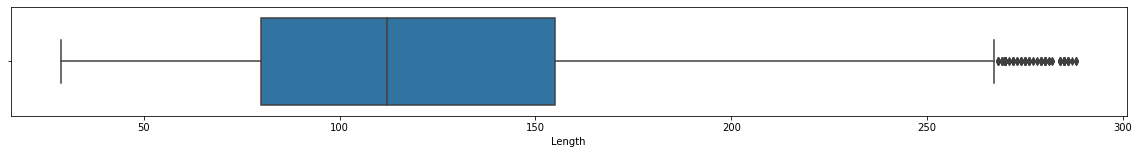

In [ ]:
# Mengecek Outliers - Boxplot
plt.figure(figsize=(20,2))
sns.boxplot(data=df_noid_outlier_clean, x=df_noid_outlier_clean['Length'])

In [ ]:
df_noid_outlier_clean['Length'].max()

288.0

Dapat diketahui dari boxplot di atas, bahwa outliers pada dataset sudah berkurang karena data di atas batas maksimum dihapus dari dataset. Namun, dari boxplot dapat dilihat bahwa terdapat sedikit outliers karena batas atas dan IQR dari dataset pada df_noid_outlier_clean berubah. Mari kita cek ada berapa outliers yang tersisa

In [ ]:
q1 = df_noid_outlier_clean['Length'].quantile(0.25)
q3 = df_noid_outlier_clean['Length'].quantile(0.75)
iqr = q3-q1
iqr

75.0

In [ ]:
batas_atas = q3 + 1.5 * iqr
batas_atas

267.5

In [ ]:
jml_outliers = (df_noid_outlier_clean['Length'] > batas_atas).sum()
print(jml_outliers)

154


In [ ]:
persentase_outliers = jml_outliers / df_noid_outlier_clean.shape[0] * 100
print(persentase_outliers)

1.5025856181090838


Dapat diketahui bahwa outliers berjumlah 154/ 1.5% dari jumlah dataset

#### Teknik Winsorizing Outlier
----

In [ ]:
# Memuat data dengan format csv
df = pd.read_csv("delay_maskapai.csv")

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
df['Length'] = winsorize(df['Length'], limits=[0, 0.05])

Kode di atas menggunakan fungsi winsorize dari library scipy.stats untuk melakukan proses winsorizing pada kolom 'Length' dalam DataFrame df.

Berikut adalah penjelasan untuk setiap bagian dalam kode tersebut:

- df['Length'] merujuk ke kolom 'Length' dalam DataFrame df, yang akan diubah nilainya dengan proses winsorizing.

- winsorize() adalah fungsi dari library scipy.stats yang digunakan untuk melakukan winsorizing pada data. Fungsi ini menerima dua argumen utama: data yang akan diwinsorize dan batas-batas yang akan digunakan. Pada kode tersebut, kita menggunakan batas [0, 0.05], yang berarti membatasi 0% data terendah dan 5% data tertinggi dalam kolom 'Length'. Nilai-nilai di luar rentang ini akan digantikan oleh nilai batas atas dan batas bawah.

Hasil winsorizing, yaitu data 'Length' yang telah dimodifikasi, ditetapkan kembali ke kolom 'Length' dalam DataFrame df.

<Axes: xlabel='Length'>

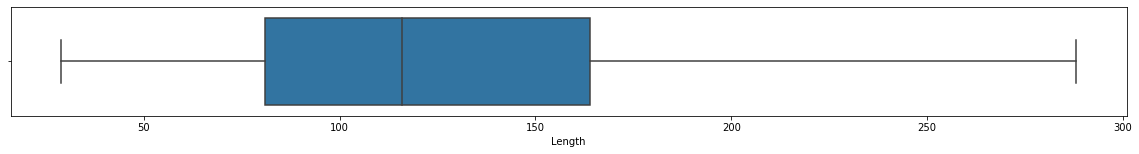

In [ ]:
# Mencari Outliers - Boxplot
plt.figure(figsize=(20,2))
sns.boxplot(data=df, x=df['Length'])

In [ ]:
# Melihat nilai maksimal dari kolom Length
df['Length'].max()

288.0

In [ ]:
# Melihat ukuran baris dan kolom setelah di-winsorize
df.shape

(10787, 8)

Dapat diketahui bahwa ukuran dataset tidak berubah setelah di-winsorize, hal ini berbeda dari metode trimming yang menghapus data yang termasuk outliers.

Kemudian dari visualisasi boxplot, bisa dilihat bahwa sudah tidak ada outliers pada dataset.

### 6. Scaling (Penskalaan)
---

Scaling bertujuan untuk mengubah data ke dalam sebuah skala tertentu, seperti 0-100 atau 0-1.

Contoh : Data numerik (biasanya) tidak memiliki range. range  “Usia” vs range “Gaji” tidak sama (karakteristik berbeda). Usia memiliki rentang dari 1 sampai 150 (dalam tahun), sedangkan Gaji memiliki rentang dari 10 ribu sampai 100 ribu (dalam dolar). Untuk itu membandingkan perlu scaling.

**Jenis Scaling**
<center>
    <img src="https://drive.google.com/uc?export=view&id=1agHfLrSOktOWrALcI-v4v15EVj2fqVs7"  width="500" />
</center>

#### Scaling : Standardisasi
---

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("delay_maskapai.csv")

In [ ]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [ ]:
# Melakukan standardisasi secara manual untuk kolom numerikal (Time & Length)
data = df[['Time','Length']]

In [ ]:
# Menghitung rata-rata dari setiap kolom
means = data.mean(axis=0) # Menghitung rata-rata per kolom.
means

Time      803.193566
Length    133.346621
dtype: float64

In [ ]:
std = data.std(axis=0) # Menghitung standar deviasi per kolom
std

Time      276.976027
Length     71.598884
dtype: float64

In [ ]:
# Melakukan standardisasi
standarisation_scaled = (data - means) / std

In [ ]:
# Mengganti data pada kolom Time & Length dengan data yang telah di-standardisasi
df[['Time','Length']] = standarisation_scaled

In [ ]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.241199,0.651594,CO,IAH,PHX,5,0
1,3045.0,-1.582063,-0.940610,OO,DSM,MKE,2,0
2,1560.0,-0.228155,1.727029,DL,SEA,CVG,7,0
3,1156.0,-0.751666,1.419762,WN,SNA,MDW,7,1
4,1873.0,-0.986344,-0.004841,CO,IAH,MCO,6,1


In [ ]:
# Melakukan standardisasi dengan library Sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("delay_maskapai.csv")

In [ ]:
# Memanggil objek StandardScaler dari sklearn
scaler = StandardScaler()

In [ ]:
# Melakukan standardisasi
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])

In [ ]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.241211,0.651624,CO,IAH,PHX,5,0
1,3045.0,-1.582136,-0.940654,OO,DSM,MKE,2,0
2,1560.0,-0.228166,1.727109,DL,SEA,CVG,7,0
3,1156.0,-0.751701,1.419828,WN,SNA,MDW,7,1
4,1873.0,-0.986389,-0.004841,CO,IAH,MCO,6,1


#### Scaling : Normalisasi / MinMax Scaling
---

In [ ]:
# Melakukan normalisasi secara manual untuk kolom numerikal (Time & Length)
data = df[['Time','Length']]

In [ ]:
means = data.mean(axis=0)

In [ ]:
max_min = data.max(axis=0) - data.min(axis=0)

In [ ]:
max_min

Time      5.141478
Length    8.743558
dtype: float64

In [ ]:
max_min_scaled = (data - data.min(axis=0)) / max_min

In [ ]:
df[['Time','Length']] = max_min_scaled

In [ ]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.600421,0.241214,CO,IAH,PHX,5,0
1,3045.0,0.245787,0.059105,OO,DSM,MKE,2,0
2,1560.0,0.509129,0.364217,DL,SEA,CVG,7,0
3,1156.0,0.407303,0.329073,WN,SNA,MDW,7,1
4,1873.0,0.361657,0.166134,CO,IAH,MCO,6,1


In [ ]:
df = pd.read_csv("delay_maskapai.csv")

In [ ]:
# Normalisasi MinMax scaling dengan library sci-kit learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.600421,0.241214,CO,IAH,PHX,5,0
1,3045.0,0.245787,0.059105,OO,DSM,MKE,2,0
2,1560.0,0.509129,0.364217,DL,SEA,CVG,7,0
3,1156.0,0.407303,0.329073,WN,SNA,MDW,7,1
4,1873.0,0.361657,0.166134,CO,IAH,MCO,6,1


In [ ]:
df = pd.read_csv("delay_maskapai.csv")

In [ ]:
# Mengevaluasi Hasil Scaling
from sklearn import preprocessing
numerical_col = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_col = numerical_col[1:-2]
numerical_col

['Time', 'Length']

In [ ]:
# StandardScaler
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df[numerical_col])
standard_df = pd.DataFrame(standard_df, columns = numerical_col)
standard_df.head()

,Time,Length
0,0.241211,0.651624
1,-1.582136,-0.940654
2,-0.228166,1.727109
3,-0.751701,1.419828
4,-0.986389,-0.004841


In [ ]:
# Normalisasi/MinMax Scaler
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df[numerical_col])
minmax_df = pd.DataFrame(minmax_df, columns = numerical_col)
minmax_df.head()

,Time,Length
0,0.600421,0.241214
1,0.245787,0.059105
2,0.509129,0.364217
3,0.407303,0.329073
4,0.361657,0.166134


In [ ]:
# Robust Scaling
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df[numerical_col])
robust_df = pd.DataFrame(robust_df, columns = numerical_col)
robust_df.head()

,Time,Length
0,0.160256,0.771084
1,-0.918803,-0.602410
2,-0.117521,1.698795
3,-0.427350,1.433735
4,-0.566239,0.204819


Sebagati tambahan, kita akan menggunakan robust scaling adalah sebuah metode dalam preprocessing data yang bertujuan untuk mengubah skala data dengan mempertahankan ketahanan terhadap nilai-nilai ekstrem atau outlier. Metode ini sangat berguna ketika data memiliki nilai ekstrem yang signifikan dan dapat mempengaruhi analisis atau pemodelan yang dilakukan.

Berbeda dengan metode standar seperti Standard Scaling (Z-score normalization) yang menggunakan mean dan standard deviation, Robust Scaling menggunakan median dan interquartile range (IQR) untuk melakukan transformasi data. IQR adalah rentang antara kuartil ke-1 (Q1) dan kuartil ke-3 (Q3) pada data.

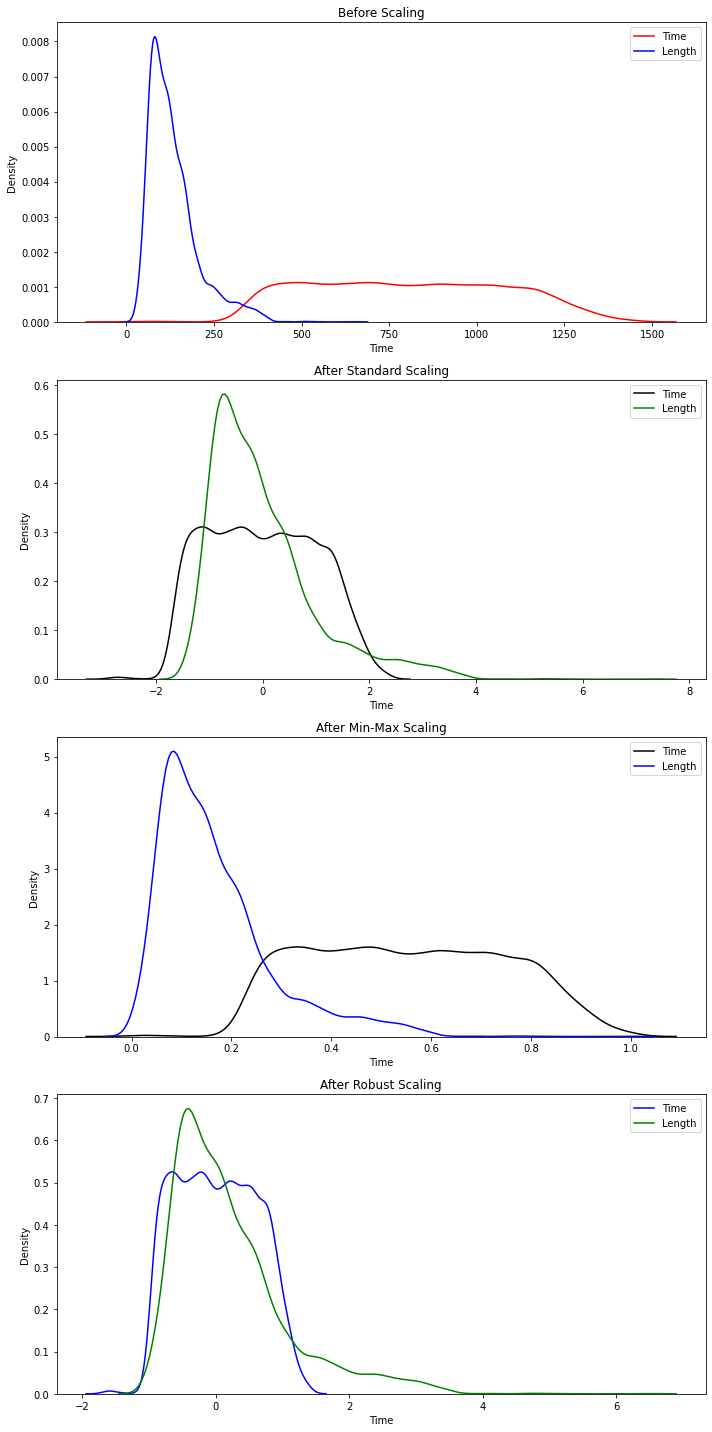

In [ ]:
fig, axes = plt.subplots(nrows=4, figsize=(10, 20))

axes[0].set_title('Before Scaling')
sns.kdeplot(df[numerical_col[0]], ax=axes[0], color='r', label=numerical_col[0])
sns.kdeplot(df[numerical_col[1]], ax=axes[0], color='b', label=numerical_col[1])
axes[0].legend()

axes[1].set_title('After Standard Scaling')
sns.kdeplot(standard_df[numerical_col[0]], ax=axes[1], color='black', label=numerical_col[0])
sns.kdeplot(standard_df[numerical_col[1]], ax=axes[1], color='g', label=numerical_col[1])
axes[1].legend()

axes[2].set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df[numerical_col[0]], ax=axes[2], color='black', label=numerical_col[0])
sns.kdeplot(minmax_df[numerical_col[1]], ax=axes[2], color='b', label=numerical_col[1])
axes[2].legend()

axes[3].set_title('After Robust Scaling')
sns.kdeplot(robust_df[numerical_col[0]], ax=axes[3], color='blue', label=numerical_col[0])
sns.kdeplot(robust_df[numerical_col[1]], ax=axes[3], color='green', label=numerical_col[1])
axes[3].legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# CV before scaling
cv_before_scaling = np.std(df[numerical_col]) / df[numerical_col].mean(axis=0)

# CV after scaling
cv_standard = np.std(standard_df[numerical_col]) / df[numerical_col].mean(axis=0)
cv_minmax = np.std(minmax_df[numerical_col]) / df[numerical_col].mean(axis=0)
cv_robust = np.std(robust_df[numerical_col]) / df[numerical_col].mean(axis=0)

print('CV Before Scaling:\n', cv_before_scaling)
print('-'*70)
print('CV After Standard Scaling:\n', cv_standard)
print('-'*70)
print('CV After Min-Max Scaling:\n', cv_minmax)
print('-'*70)
print('CV After Robust Scaling:\n', cv_robust)

CV Before Scaling:
 Time      0.344827
Length    0.536913
dtype: float64
----------------------------------------------------------------------
CV After Standard Scaling:
 Time      0.001245
Length    0.007499
dtype: float64
----------------------------------------------------------------------
CV After Min-Max Scaling:
 Time      0.000242
Length    0.000858
dtype: float64
----------------------------------------------------------------------
CV After Robust Scaling:
 Time      0.000737
Length    0.006469
dtype: float64


Nilai CV (Coefficient of Variation) adalah ukuran statistik yang digunakan untuk mengukur tingkat variasi relatif dari sebuah distribusi data. CV menggambarkan seberapa besar variasi data dalam persentase terhadap rata-rata data.

CV menghasilkan nilai dalam bentuk persentase. Semakin tinggi nilai CV, semakin besar variasi relatif dalam distribusi data. Nilai CV yang lebih kecil menunjukkan tingkat variasi yang lebih rendah, sedangkan nilai CV yang lebih tinggi menunjukkan tingkat variasi yang lebih tinggi.

### 7. Dokumentasi Data/Fitur
---

<center>
    <img src="https://drive.google.com/uc?export=view&id=1WnLL7CKZ0955yv2UCcqQ6c2hybBoJV_n"  width="500" />
</center>

Laporan dokumentasi data transformation, setidaknya memiliki parameter berikut:
- Fitur awal dan rekayasa fitur yang digunakan
- Teknik transformasi data yang diterapkan
    - Apakah algoritma pemodelan mengharapkan jenis data tertentu, seperti numerik? Jika demikian, lakukan transformasi yang diperlukan
    - Apakah data perlu dinormalisasi sebelum pemodelan?
    - Bisakah atribut yang hilang dibangun menggunakan agregasi, rata-rata, atau induksi?
- Hasil transformasi
- Rekomendasi transformasi



### 8. Pelabelan Data
---

<center>
    <img src="https://drive.google.com/uc?export=view&id=1N6vd9WgKcDN_EYo-vqrz1_E2HabzyA9f"  width="500" />
</center>

<center>
    <img src="https://drive.google.com/uc?export=view&id=1cM1XDmvN8zNqN2f0-H-wsGZkJmqxWrzC"  width="700" />
</center>

- Label encoding menggantikan nilai kategori dengan angka, yaitu mengubah setiap nilai kategori menjadi bilangan bulat. Pendekatan ini bergantung pada urutan nilai dan dapat digunakan untuk variabel kategorikal dengan tingkatan yang terurut.

    Pada contoh di atas negara India, Japan, dan US diubah menjadi bilangan 0,1,2 dan masih berada pada kolom di atas

    Keuntungan label encoding adalah sederhana dan efisien dalam representasi data yang membutuhkan perhatian pada urutan. Namun, metode ini juga bisa menimbulkan masalah seperti memberikan bobot pada variabel kategorikal yang seharusnya tidak ada urutan yang intrinsik, yang dapat menyebabkan algoritma pembelajaran mesin memberikan arti yang tidak diinginkan pada variabel tersebut.

- One-hot encoding menghasilkan vektor biner dengan panjang yang sama dengan jumlah kategori unik dalam variabel. Setiap vektor biner memiliki nilai 1 untuk kategori yang relevan dan nilai 0 untuk kategori lainnya. Pada contoh di atas, kolom negara dipecah sesuai isian datanya sehingga membentuk kolom masing-masing seperti India -> kolom 0, Japan -> kolom 1, dan US -> kolom 2

    Keuntungan one-hot encoding adalah tidak ada penekanan urutan dan tidak ada bobot yang diberikan pada variabel kategorikal. Ini menghindari masalah yang mungkin timbul dengan label encoding. Namun, jika jumlah kategori unik sangat besar, one-hot encoding dapat menyebabkan ledakan dimensi dan meningkatkan kompleksitas pemrosesan.

In [ ]:
# Label Encoding
import pandas as pd
from sklearn import preprocessing

In [ ]:
df = pd.read_csv("delay_maskapai.csv")

In [ ]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [ ]:
# Encoding Kolom Kategori
le = preprocessing.LabelEncoder()
df[cat_col] = df[cat_col].apply(le.fit_transform)

In [ ]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,4,125,199,4,0
1,3045.0,365.0,66.0,12,76,170,1,0
2,1560.0,740.0,257.0,5,235,64,6,0
3,1156.0,595.0,235.0,15,245,162,6,1
4,1873.0,530.0,133.0,4,125,160,5,1


In [ ]:
# One Hot Encoding
df = pd.read_csv("delay_maskapai.csv")

In [ ]:
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']
df = pd.get_dummies(data=df,columns=cat_col,drop_first=True)
df.head()

,Flight,Time,Length,Class,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,320.0,870.0,180.0,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,3045.0,365.0,66.0,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1560.0,740.0,257.0,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,1156.0,595.0,235.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1873.0,530.0,133.0,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


### 8. Menganalisa Akurasi Pelabelan Data
---

- Business Goals suatu AI  yang berbeda memerlukan ukuran kualitas data yang berbeda.

- Keseimbangan dan variasi titik data di dalam dataset merupakan indikator seberapa baik algoritma dapat memprediksi suatu titik atau pola selanjutnya.

- Misal tugas suatu AI adalah membedakan antara kendaraan yang bergerak dan tidak bergerak. Jika dataset memuat 90% gambar mobil bergerak tetapi hanya 10% yang diparkir, maka dapat dianggap tidak seimbang.

- Untuk mengatasi masalah ini dapat digunakan teknik seperti oversampling, downsampling atau weight balancing.

- Kualitas data set untuk pelatihan model sering ditentukan oleh seberapa tepat label dan kategori ditempatkan pada setiap titik data.
- Namun, bukan hanya tentang keakuratan pelabelan data tetapi juga tentang seberapa konsisten keakuratannya.
    - Akurasi dan konsistensi data diukur selama proses penjaminan mutu, langkah-langkah terpisah yang dapat dilakukan secara manual atau otomatis.
    - Pendekatan yang berbeda dapat digabungkan untuk cross check dan memastikan kesempurnaan data set.




<center>
    <img src="https://drive.google.com/uc?export=view&id=1xwwQEO-nB993e8UB4V37lrzIl04jagxM"  width="500" />
</center>

#### Apa yang mempengaruhi kualitas data dalam pelabelan?


- Knowledge and context
    - Pengetahuan dasar satu domain dan pemahaman kontekstual sangat penting seperti pemberi label untuk membuat set data terstruktur berkualitas tinggi.
- Agility
    - Pelabelan data berkembang saat dilakukan pengujian dan validasi model, sehingga harus disiapkan data set baru dan memperkaya data set yang ada untuk meningkatkan hasil algoritma Machine Learning.
- Relationship
    - Kita memerlukan pemberi label data yang dapat merespons dengan cepat dan mengikuti alur kerja tim, berdasarkan apa yang telah dipelajari dalam fase pengujian dan validasi model.
- Communication
    - Pendekatan umpan balik (feedback) adalah cara terbaik untuk membangun komunikasi dan kolaborasi yang andal antara tim dan pemberi label data.


### 9. Metode QA untuk Mengukur Kualitas Data
---

- Consensus Algorithm
    - Merupakan proses untuk mencapai reliabilitas data melalui kesepakatan pada satu titik data di antara beberapa individu pemberi label data atau suatu organisasi.
    - Konsensus dapat dilakukan dengan menetapkan sejumlah reviewer per titik data (umumnya untuk data open source) atau sepenuhnya otomatis.

- Benchmarking and Gold Standard
    - Benchmarking adalah pendekatan yang lebih kompleks dan andal untuk QA, karena menggunakan standar tertentu.
    - Menggunakan otomatisasi, pemberi label mendapatkan benchmark secara acak untuk memastikan bahwa label dan anotasi mematuhi referensi yang telah ditentukan
    - Ahli diperlukan hanya untuk membuat referensi dan meninjau kualitas secara keseluruhan dan potensi penyimpangan.

- Sample review
    - Pilih sampel acak dari hasil pelabelan yang telah diselesaikan.
    - Pekerja yang lebih berpengalaman, seperti pemimpin tim atau manajer proyek, dapat meninjau sampel untuk mengukur akurasinya.

- Cronbach's Alpha Test
    - Digunakan sebagai ukuran korelasi rata-rata atau konsistensi item dalam dataset, yang tergantung pada karakteristik penelitian (misal homogenitas).
    - Dapat membantu dengan cepat melihat keandalan label secara keseluruhan.



### 10.Keamanan Pelabelan Data
---

Tiga area yang perlu menjadi perhatian untuk menjaga keamanan dokumen
- **Orang dan Tenaga Kerja** : Ini dapat mencakup pemeriksaan latar belakang untuk pekerja dan mungkin mengharuskan pemberi label untuk menandatangani perjanjian kerahasiaan (NDA) atau dokumen serupa yang menguraikan persyaratan keamanan data.
- **Teknologi dan Jaringan** : Pekerja mungkin diminta untuk menyerahkan perangkat yang mereka bawa ke tempat kerja, seperti ponsel atau tablet.
- **Fasilitas dan Ruang Kerja** : Pekerja dapat duduk di tempat yang menghalangi orang lain untuk melihat pekerjaan mereka.
